In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation 
import copy

sys.path.append(r"C:/Users/haoyuan/Documents/GitHub/XRaySimulation/")

from XRaySimulation import util, Crystal

# Crystals in the delayed branch

In [2]:
from XRaySimulation import Pulse, MultiDevice, util, Crystal
import numpy as np


def get_grating_and_crystals():
    energy_center = 9.5
    pre_length = 1e6

    # Set up the pulse
    FWHM = 50.  # (um)

    my_pulse = Pulse.GaussianPulse3D()
    my_pulse.set_pulse_properties(central_energy=energy_center,
                                  polar=[1., 0., 0.],
                                  sigma_x=FWHM / 2. / np.sqrt(np.log(2)) / util.c,
                                  sigma_y=FWHM / 2. / np.sqrt(np.log(2)) / util.c,
                                  sigma_z=9.,
                                  x0=np.array([0., 0., -pre_length]))

    #################################################################################################
    #                         VCC branch
    #################################################################################################
    # Define physical parameters
    h_length = 2. * np.pi / (1.9201 * 1e-4)

    # Some crystal properties
    chi_dict = {"chi0": complex(-0.97631E-05, 0.14871E-06),
                "chih_sigma": complex(0.59310E-05, -0.14320E-06),
                "chihbar_sigma": complex(0.59310E-05, -0.14320E-06),
                "chih_pi": complex(0.46945E-05, -0.11201E-06),
                "chihbar_pi": complex(0.46945E-05, -0.11201E-06),
                }

    # Get crystal_list
    thetas = np.pi / 2. * np.array([1, -1, -1, 1, 1, -1, -1, 1], dtype=np.float64)

    rhos = thetas + np.pi
    rhos += np.deg2rad(np.random.rand(8) * 10 - 5)
    #rhos[[1, 6]] -= np.deg2rad(5)
    #rhos[[2, 5]] += np.deg2rad(5)

    vcc_crystals = [Crystal.CrystalBlock3D(h=np.array([0, np.sin(thetas[x]), np.cos(thetas[x])]) * h_length,
                                           normal=np.array([0., np.sin(rhos[x]), np.cos(rhos[x])]),
                                           surface_point=np.zeros(3),
                                           thickness=1e6,
                                           chi_dict=chi_dict)
                    for x in range(8)]

    # ----------------------------------------------------------------------
    #          Crystal 1
    # ----------------------------------------------------------------------
    boundary = np.array([[0, 10, 0],
                         [50, 10, 0],
                         [50, 0, 0],
                         [0, 0, 0]], dtype=np.float64) * 1000

    vcc_crystals[0].boundary = np.copy(boundary[:, [2, 1, 0]])
    vcc_crystals[0].set_surface_point(np.copy(vcc_crystals[0].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 2
    # ----------------------------------------------------------------------
    boundary = np.array([[25.070, 26.40, 0],
                         [90.070, 20.753, 0],
                         [90.070, 36.40, 0],
                         [25.070, 36.40, 0]], dtype=np.float64) * 1000

    vcc_crystals[1].boundary = np.copy(boundary[:, [2, 1, 0]])
    vcc_crystals[1].set_surface_point(np.copy(vcc_crystals[1].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 3
    # ----------------------------------------------------------------------
    boundary = np.copy(vcc_crystals[1].boundary)
    boundary[:, 2] *= -1

    vcc_crystals[2].boundary = np.copy(boundary)
    vcc_crystals[2].set_surface_point(np.copy(vcc_crystals[2].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 4
    # ----------------------------------------------------------------------
    boundary = np.copy(vcc_crystals[0].boundary)
    boundary[:, 2] *= -1

    vcc_crystals[3].boundary = np.copy(boundary)
    vcc_crystals[3].set_surface_point(np.copy(vcc_crystals[3].boundary[0]))

    # ----------------------------------------------------------------------
    #          Crystal 5
    # ----------------------------------------------------------------------
    vcc_crystals[4].boundary = np.copy(np.copy(vcc_crystals[3].boundary))
    vcc_crystals[4].set_surface_point(np.copy(vcc_crystals[4].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 7
    # ----------------------------------------------------------------------
    boundary = np.array([[25.070, 26.40, 0],
                         [90.070, 20.753, 0],
                         [90.070, 30.753, 0],
                         [25.070, 36.40, 0]], dtype=np.float64) * 1000

    vcc_crystals[6].boundary = np.copy(boundary[:, [2, 1, 0]])
    vcc_crystals[6].set_surface_point(np.copy(vcc_crystals[6].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 6
    # ----------------------------------------------------------------------
    boundary = np.copy(vcc_crystals[6].boundary)
    boundary[:, 2] *= -1

    vcc_crystals[5].boundary = np.copy(boundary)
    vcc_crystals[5].set_surface_point(np.copy(vcc_crystals[5].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 8
    # ----------------------------------------------------------------------
    vcc_crystals[7].boundary = np.copy(vcc_crystals[0].boundary)
    vcc_crystals[7].set_surface_point(np.copy(vcc_crystals[7].boundary[0]))

    # ---------------------------------------------------------------------------

    #################################################################################################
    #                         CC branch
    thetas = np.array([-np.pi / 2,
                       np.pi / 2,
                       np.pi / 2,
                       -np.pi / 2])
    rhos = thetas + np.pi

    cc_crystals = [Crystal.CrystalBlock3D(h=np.array([0, np.sin(thetas[x]), np.cos(thetas[x])]) * h_length,
                                          normal=np.array([0., np.sin(rhos[x]), np.cos(rhos[x])]),
                                          surface_point=np.zeros(3),
                                          thickness=1e6,
                                          chi_dict=chi_dict)
                   for x in range(4)]
    # ----------------------------------------------------------------------
    #          Crystal 1
    # ----------------------------------------------------------------------
    boundary = np.array([[-60, 12.57, 0],
                         [-20, 12.57, 0],
                         [-20, 22.57, 0],
                         [-22.68, 22.57, 0]])
    boundary -= np.array([-60, -22.57, 0])[np.newaxis, :]
    boundary *= 1000

    cc_crystals[0].boundary = np.copy(boundary[:, [2, 1, 0]])
    cc_crystals[0].set_surface_point(np.copy(cc_crystals[0].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 2
    # ----------------------------------------------------------------------
    boundary = np.array([[-60, -12.58, 0],
                         [60, -12.58, 0],
                         [60, -22.57, 0],
                         [-60, -22.57, 0]])
    boundary -= np.array([-60, -22.57, 0])[np.newaxis, :]
    boundary *= 1000

    cc_crystals[1].boundary = np.copy(boundary[:, [2, 1, 0]])
    cc_crystals[1].set_surface_point(np.copy(cc_crystals[1].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 3
    # ----------------------------------------------------------------------
    boundary = np.array([[-65, -12.90, 0],
                         [65, -12.90, 0],
                         [65, -22.90, 0],
                         [-65, -22.90, 0]])
    boundary -= np.array([-65, -22.90, 0])[np.newaxis, :]
    boundary *= 1000

    cc_crystals[2].boundary = np.copy(boundary[:, [2, 1, 0]])
    cc_crystals[2].set_surface_point(np.copy(cc_crystals[2].boundary[0]))
    # ----------------------------------------------------------------------
    #          Crystal 4
    # ----------------------------------------------------------------------
    boundary = np.array([[45, 12.90, 0],
                         [65, 12.90, 0],
                         [65, 22.90, 0],
                         [45, 22.90, 0]])
    boundary -= np.array([-65, -22.90, 0])[np.newaxis, :]
    boundary *= 1000

    cc_crystals[3].boundary = np.copy(boundary[:, [2, 1, 0]])
    cc_crystals[3].set_surface_point(np.copy(cc_crystals[3].boundary[0]))

    return my_pulse, vcc_crystals, cc_crystals


def align_vcc_crystals(kin, crystals):
    kin_new = np.copy(kin)

    #####################################################
    #     Align CC1
    #####################################################
    rot_center = np.copy((crystals[0].boundary[0] + crystals[0].boundary[1]) / 2.)

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[0],
                                                  kin=kin_new,
                                                  rot_direction=-1.,
                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[1],
                                          axis=-crystals[0].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals[:2],
                                   kin=kin)
    kin_new = kin_new[-1]

    crystals[0].shift(-rot_center)
    crystals[1].shift(-rot_center)

    #####################################################
    #     Align CC2
    #####################################################
    rot_center = np.copy((crystals[3].boundary[0] + crystals[3].boundary[1]) / 2.)

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[2],
                                                  kin=kin_new,
                                                  rot_direction=1.,
                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[3],
                                          axis=-crystals[2].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals[:4],
                                   kin=kin)
    kin_new = kin_new[-1]

    crystals[2].shift(-rot_center)
    crystals[3].shift(-rot_center)
    #####################################################
    #     Align CC3
    #####################################################
    rot_center = (crystals[4].boundary[0] + crystals[4].boundary[1]) / 2.

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[4],
                                                  kin=kin_new,
                                                  rot_direction=1.,

                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[5],
                                          axis=-crystals[4].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals[:6],
                                   kin=kin)
    kin_new = kin_new[-1]

    crystals[4].shift(-rot_center)
    crystals[5].shift(-rot_center)
    #####################################################
    #     Align CC4
    #####################################################
    rot_center = (crystals[7].boundary[0] + crystals[7].boundary[1]) / 2.

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[6],
                                                  kin=kin_new,
                                                  rot_direction=-1.,
                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[7],
                                          axis=-crystals[6].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals,
                                   kin=kin)
    kin_new = kin_new[-1]
    crystals[6].shift(-rot_center)
    crystals[7].shift(-rot_center)

    return crystals, kin_new


def align_cc_crystals(kin, crystals):
    kin_new = np.copy(kin)

    #####################################################
    #     Align CC1
    #####################################################
    rot_center = np.copy((crystals[0].boundary[0]))

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[0],
                                                  kin=kin_new,
                                                  rot_direction=1.,
                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[1],
                                          axis=-crystals[0].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals[:2],
                                   kin=kin)
    kin_new = kin_new[-1]

    crystals[0].shift(-rot_center)
    crystals[1].shift(-rot_center)
    #####################################################
    #     Align CC2
    #####################################################
    rot_center = np.copy((crystals[3].boundary[0]))

    # Align the 1 crystal
    util.align_crystal_dynamical_bragg_reflection(crystal=crystals[2],
                                                  kin=kin_new,
                                                  rot_direction=-1.,
                                                  rot_center=rot_center)
    # Align the 2nd crystal
    util.align_crystal_reciprocal_lattice(crystal=crystals[3],
                                          axis=-crystals[2].h,
                                          rot_center=rot_center)

    # Get the kout from this crystal
    kin_new = MultiDevice.get_kout(device_list=crystals[:4],
                                   kin=kin)
    kin_new = kin_new[-1]

    crystals[2].shift(-rot_center)
    crystals[3].shift(-rot_center)
    return crystals, kin_new


def set_crystal_positions(vcc, cc):
    # CC1 of the CC branch is at the assumed position

    # First shift VCC1
    vcc[0].shift(np.array([0, 0, 198.51]) * 1e3)
    vcc[1].shift(np.array([0, 0, 198.51]) * 1e3)

    # Second shift VCC2
    vcc[2].shift(np.array([0, 0, 198.51 + 178.]) * 1e3)
    vcc[3].shift(np.array([0, 0, 198.51 + 178.]) * 1e3)

    # Third shift VCC3
    vcc[4].shift(np.array([0, 0, 198.51 + 178. + 223.49]) * 1e3)
    vcc[5].shift(np.array([0, 0, 198.51 + 178. + 223.49]) * 1e3)

    # Forth shift VCC3
    vcc[6].shift(np.array([0, 0, 198.51 + 178. + 223.49 + 225.01]) * 1e3)
    vcc[7].shift(np.array([0, 0, 198.51 + 178. + 223.49 + 225.01]) * 1e3)

    # Shift the second CC in CC branch
    cc[2].shift(np.array([0, 0, 198.51 + 178. + 223.49 + 225.01 + 225.01]) * 1e3)
    cc[3].shift(np.array([0, 0, 198.51 + 178. + 223.49 + 225.01 + 225.01]) * 1e3)


def get_trajectory(vcc_motion=np.zeros(8), cc_motion=np.zeros(4)):
    # Create the setup
    (my_pulse,
     vcc_crystals,
     cc_crystals) = get_grating_and_crystals()

    kin_new = my_pulse.k0
    _, vcc_kout = align_vcc_crystals(kin=kin_new, crystals=vcc_crystals)

    kin_new = my_pulse.k0
    _, cc_kout = align_cc_crystals(kin=kin_new, crystals=cc_crystals)

    set_crystal_positions(vcc=vcc_crystals, cc=cc_crystals)

    # Move the crystals along the y axis
    for x in range(8):
        vcc_crystals[x].shift(displacement=np.array([0., vcc_motion[x], 0.], dtype=np.float64))
    for x in range(4):
        cc_crystals[x].shift(displacement=np.array([0., cc_motion[x], 0.], dtype=np.float64))

    # Get the trajectory of VCC and CC branch
    device_list = vcc_crystals

    (vcc_trajectory,
     vcc_kout_list,
     vcc_path) = MultiDevice.get_lightpath(device_list=device_list,
                                           kin=my_pulse.k0,
                                           initial_point=my_pulse.x0,
                                           final_plane_point=np.array((0, 0, 10e6),
                                                                      dtype=np.float64),
                                           final_plane_normal=np.array((0, 0, -1),
                                                                       dtype=np.float64))
    vcc_trajectory = np.vstack(vcc_trajectory)
    vcc_kout_list = np.vstack(vcc_kout_list)

    device_list = cc_crystals

    (cc_trajectory,
     cc_kout_list,
     cc_path) = MultiDevice.get_lightpath(device_list=device_list,
                                          kin=my_pulse.k0,
                                          initial_point=my_pulse.x0,
                                          final_plane_point=np.array((0, 0, 10e6),
                                                                     dtype=np.float64),
                                          final_plane_normal=np.array((0, 0, -1),
                                                                      dtype=np.float64))
    cc_trajectory = np.vstack(cc_trajectory)
    cc_kout_list = np.vstack(cc_kout_list)

    return vcc_trajectory, vcc_kout_list, vcc_path, vcc_crystals, cc_trajectory, cc_kout_list, cc_path, cc_crystals


def tweak_horizontal_position_ratio(vcc_motion=np.zeros(8, dtype=np.float64),
                                    cc_motion=np.zeros(4, dtype=np.float64)):
    # Position1
    config1 = get_trajectory(vcc_motion=vcc_motion, cc_motion=cc_motion)

    # Position2
    config2 = get_trajectory(vcc_motion=vcc_motion + np.array([0, 0, 0, 0,
                                                               1, 1, -1, -1],
                                                              dtype=np.float64),
                             cc_motion=cc_motion)

    # Get the horizontal shift
    horizontal_shift = config2[0][-1][1] - config1[0][-1][1]

    print("t4x + 1um and t5x - 1um results in horizontal shift of {:.2f}um".format(horizontal_shift))
    return horizontal_shift, config1


def tweak_horizontal_overlap(vcc_motion=np.zeros(8, dtype=np.float64),
                             cc_motion=np.zeros(4, dtype=np.float64)):
    # Get ratio
    horizontal_shift_per_um, current_config = tweak_horizontal_position_ratio(vcc_motion=vcc_motion,
                                                                              cc_motion=cc_motion)

    # Get the distance
    tweak_size = (current_config[4][-1][1] - current_config[0][-1][1]) / horizontal_shift_per_um
    print("To get two pulse overlap, t4x should move {:.2f} um, t5x should move {:.2f} um".format(tweak_size,
                                                                                                  - tweak_size))
    return tweak_size


def tweak_temporal(vcc_motion=np.zeros(8, dtype=np.float64),
                   cc_motion=np.zeros(4, dtype=np.float64)):
    # Position1
    config1 = get_trajectory(vcc_motion=vcc_motion, cc_motion=cc_motion)

    # Position2
    config2 = get_trajectory(vcc_motion=vcc_motion + np.array([1, 1, 1, 1,
                                                               0, 0, 0, 0],
                                                              dtype=np.float64),
                             cc_motion=cc_motion)

    # Get the horizontal shift
    temporal_shift = config2[2] - config1[2]

    print("t23 +1 um results in temporal delay of {:.2f}fs".format(temporal_shift / util.c))
    return temporal_shift, config1


def tweak_temporal_overlap(vcc_motion=np.zeros(8, dtype=np.float64),
                           cc_motion=np.zeros(4, dtype=np.float64)):
    # Get ratio
    temporal_shift_per_um, current_config = tweak_temporal(vcc_motion=vcc_motion,
                                                           cc_motion=cc_motion)

    # Get the distance
    tweak_size = (current_config[6] - current_config[2]) / temporal_shift_per_um
    print("To get two pulse overlap, t23 should move {:.2f} um".format(tweak_size))
    return tweak_size


# Crystal in the delay-fixed branch

In [3]:
t2_offset = 0
t5_offset = 0
tweak_size =tweak_horizontal_overlap(vcc_motion=np.array([t2_offset,t2_offset,
                                                          0,0,
                                                          0,0,
                                                          t5_offset,t5_offset,]),
                                     cc_motion=np.array([0,0,
                                                         600,600]))

t23_tweak_size =tweak_temporal_overlap(vcc_motion=np.array([t2_offset,t2_offset,
                                                            0,0,
                                                            tweak_size, tweak_size,
                                                            -tweak_size + t5_offset, -tweak_size + t5_offset,]),
                                     cc_motion=np.array([0,0,
                                                         600,600]))

t4x + 1um and t5x - 1um results in horizontal shift of 2186.99um
To get two pulse overlap, t4x should move -1.16 um, t5x should move 1.16 um
t23 +1 um results in temporal delay of 11088.77fs
To get two pulse overlap, t23 should move -1.64 um


In [4]:
t45_offset = -2800.
t23_offset = -2400.

(vcc_trajectory, 
 vcc_kout_list,
 vcc_path,
 vcc_crystals,
 cc_trajectory,
 cc_kout_list,
 cc_path,
 cc_crystals) = get_trajectory(vcc_motion=np.array([t23_tweak_size + t2_offset + t23_offset,
                                                    t23_tweak_size + t2_offset + t23_offset,
                                                    t23_tweak_size + t23_offset,
                                                    t23_tweak_size + t23_offset,
                                                    tweak_size + t45_offset,
                                                    tweak_size + t45_offset,
                                                    -tweak_size + t5_offset + t45_offset,
                                                    -tweak_size + t5_offset + t45_offset,]),
                               cc_motion=np.array([0,0,
                                                   600,600]))

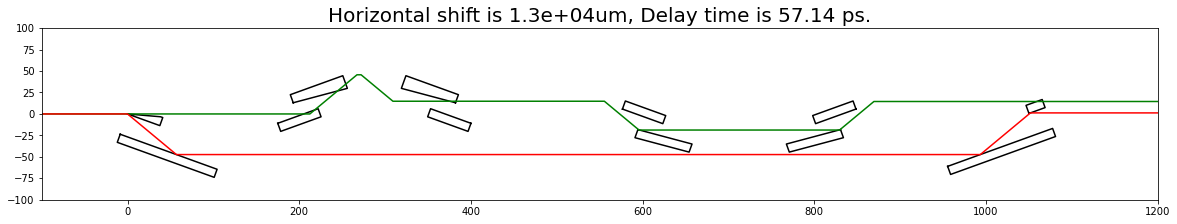

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

for x in range(8):
    ax.plot([vcc_crystals[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
             [vcc_crystals[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
            'k')
    
for x in range(4):
    ax.plot([cc_crystals[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
             [cc_crystals[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
            'k')

ax.plot(vcc_trajectory[:,2]/1000,
        vcc_trajectory[:,1]/1000,'g')

ax.plot(cc_trajectory[:,2]/1000,
        cc_trajectory[:,1]/1000,'r')

ax.set_aspect("equal")
ax.set_ylim([-100, 100])
ax.set_xlim([-100, 1200])
ax.set_title("Horizontal shift is {:.2}um, Delay time is {:.2f} ps.".format(vcc_trajectory[-1][1] - cc_trajectory[-1][1],
                                                                            (vcc_path - cc_path) / util.c / 1000),
            fontsize=20)

plt.show()

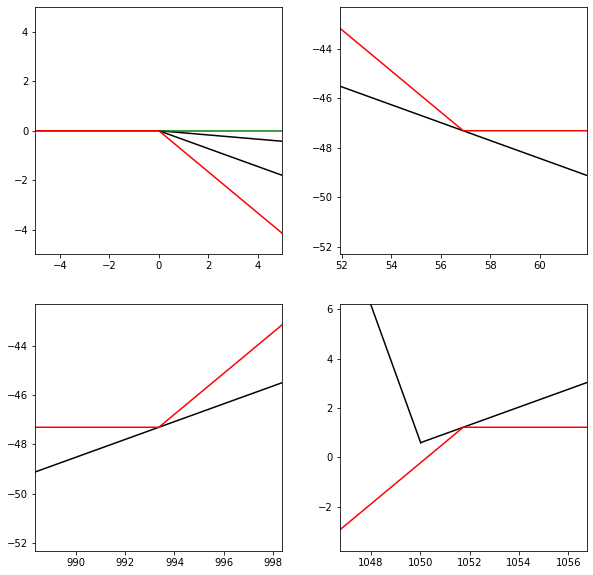

In [6]:
#############################################
#  The intersection point on the lower branch
#############################################
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)


for n1 in range(2):
    for n2 in range(2):
        ax = axes[n1, n2]
        
        for x in range(8):
            ax.plot([vcc_crystals[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
                     [vcc_crystals[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
                    'k')

        for x in range(4):
            ax.plot([cc_crystals[x].boundary[y][2]/1000 for y in [0, 1, 2, 3, 0]],
                     [cc_crystals[x].boundary[y][1]/1000 for y in [0, 1, 2, 3, 0]],
                    'k')

        ax.plot(vcc_trajectory[:,2]/1000,
                vcc_trajectory[:,1]/1000,'g')

        ax.plot(cc_trajectory[:,2]/1000,
                cc_trajectory[:,1]/1000, 'r')
        
        idx = 2 * n1 + n2 + 1
        ax.set_aspect("equal")
        ax.set_xlim([cc_trajectory[idx,2] / 1000 - 5, cc_trajectory[idx, 2] / 1000 + 5])
        ax.set_ylim([cc_trajectory[idx,1] / 1000 - 5, cc_trajectory[idx, 1] / 1000 + 5])

plt.show()

# Get trajectory and kout array for different input

In [7]:
wavevec_array = np.zeros((1000, 3))
wavevec_array[:,2] = util.kev_to_wavevec_length(np.linspace(9, 9.999, 1000))

energy_array = util.wavevec_to_kev(np.sqrt(np.sum(np.square(wavevec_array), axis=-1)))

omega_array = util.kev_to_petahertz_angular_frequency(energy_array)

In [8]:
total_length = 10e6

holder = []
for x in range(1000):
    holder.append(MultiDevice.get_trajectory(device_list=vcc_crystals,
                                             initial_point=np.array([0,0,-1e6]),
                                             kin = wavevec_array[x],
                                             path_length = total_length))

In [9]:
phase = np.zeros(1000)
for x in range(1000):
    for y in range(9):
        phase[x] += np.dot(holder[x][1][y], holder[x][0][y + 1] - holder[x][0][y])

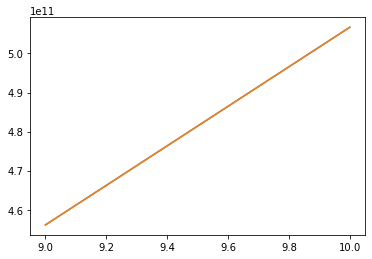

In [10]:
plt.plot(energy_array, phase)
plt.plot(energy_array, omega_array * total_length / util.c)

plt.show()

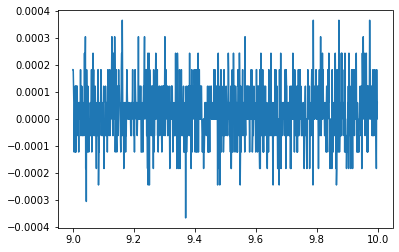

In [11]:
plt.plot(energy_array, phase - omega_array * total_length / util.c)

plt.show()

In [12]:
for x in range(10):
    print(holder[500][0][x] - vcc_trajectory[x])

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[ 0.00000000e+00 -1.38360586e+01 -1.05176328e+06]


In [13]:
phase_v2 = np.zeros(1000)
for x in range(1000):
    for y in range(9):
        phase_v2[x] += np.dot(holder[x][1][y], holder[500][0][y + 1] - holder[500][0][y])

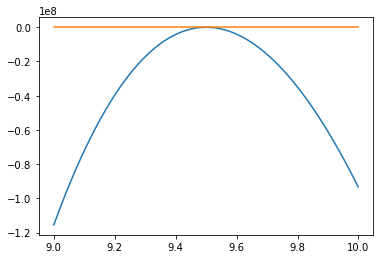

In [14]:
plt.plot(energy_array, phase_v2 - omega_array * total_length / util.c)
plt.plot(energy_array, phase - omega_array * total_length / util.c)

plt.show()

In [15]:
# The original calculation
phase_v3 = np.zeros(1000)
for x in range(1000):
    phase_v3[x] = np.dot(holder[x][1][-1] - holder[500][1][-1], holder[500][0][-1] - holder[x][0][-1]) / 2
    #phase_v3[x] = np.dot(holder[x][1][-1], holder[500][0][-1] - holder[x][0][-1])

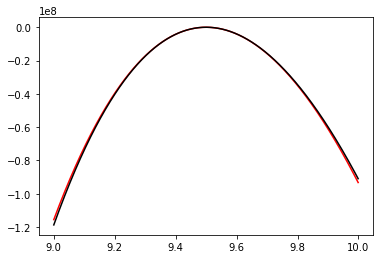

In [16]:
plt.plot(energy_array, phase_v2 - omega_array * total_length / util.c, 'r',)
plt.plot(energy_array, phase_v3, 'k')

plt.show()

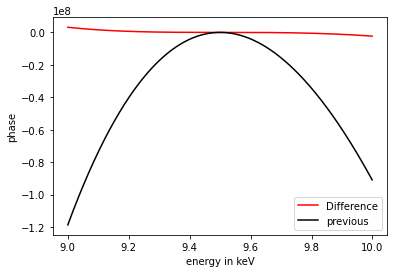

In [17]:
plt.plot(energy_array, phase_v2 - omega_array * total_length / util.c - phase_v3, 'r', label="Difference")
plt.plot(energy_array, phase_v3, 'k', label="previous")
plt.xlabel("energy in keV")
plt.ylabel("phase")
plt.legend()

plt.show()

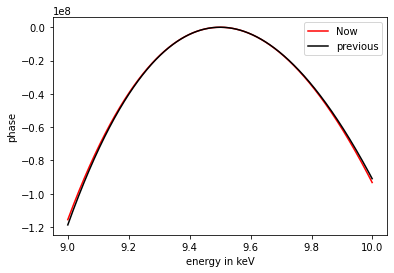

In [18]:
plt.plot(energy_array, phase_v2 - omega_array * total_length / util.c, 'r', label="Now")
plt.plot(energy_array, phase_v3, 'k', label="previous")
plt.xlabel("energy in keV")
plt.ylabel("phase")
plt.legend()
plt.show()

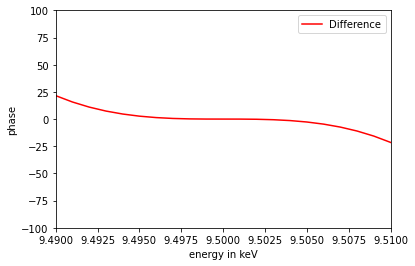

In [22]:
plt.plot(energy_array, phase_v2 - omega_array * total_length / util.c - phase_v3, 'r', label="Difference")
plt.xlabel("energy in keV")
plt.ylabel("phase")
plt.xlim([9.49,9.51])
plt.ylim([-1e2,1e2])
plt.legend()

plt.show()